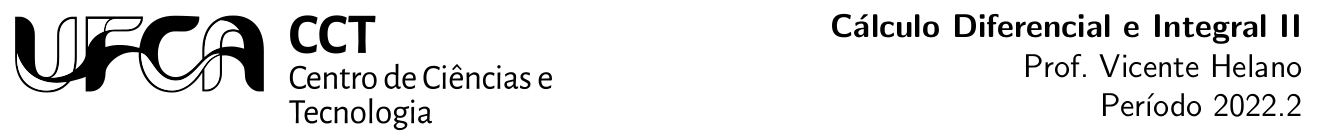

# Projeto
*O problema do salva-vidas*

## Equipe:
1.  Wanderson Faustino Patricio
1.  Francisco Anderson Maciel Cruz

## Introdução

Recentemente, um acidente ocorrido na praia do Socorro colocou em evidência um problema até então ignorado.
Um frequentador escapou com vida de uma situação de afogamento, após ter sido socorrido por um [salva-vidas](https://pt.wikipedia.org/wiki/Salva-vidas).
O salvamento somente foi possível graças à grande experiência do salva-vidas que soube escolher a trajetória mais curta para alcançar a vítima em tempo hábil.
Em entrevista logo após o acidente, ele revelou que a escolha da trajetória de salvamento depende de como está a correnteza naquele dia e do ponto de entrada no mar, pois isto pode aumentar ou diminuir o tempo gasto durante seu deslocamento pela praia e durante o trecho realizado a nado.
Neste trabalho, vocês deverão determinar a melhor trajetória para o salva-vidas de modo que o tempo de salvamento seja o menor possível.

## Hipóteses simplificadoras

O perfil típico da praia do Socorro obedece o padrão ilustrado abaixo, onde a praia média possui 50 metros de extensão.

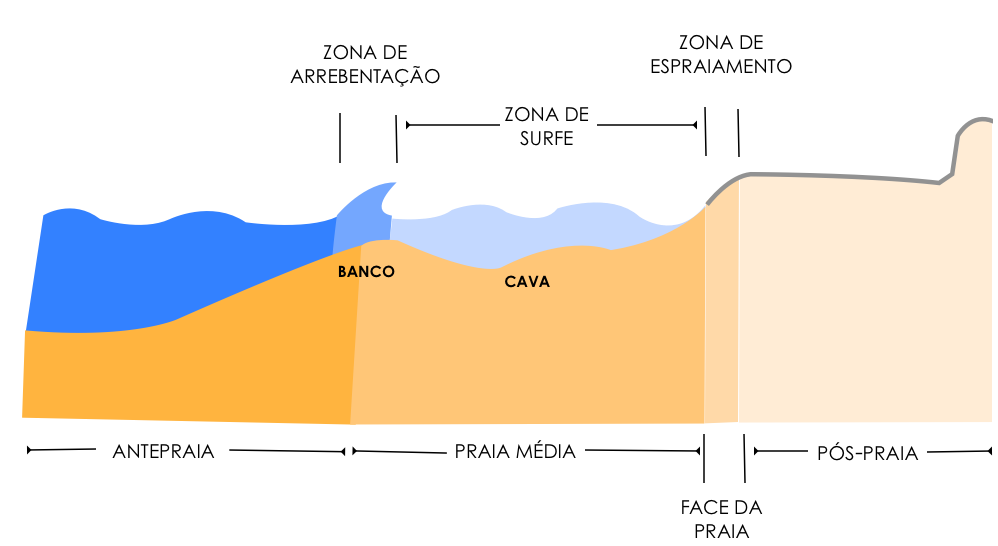

Fonte: [Olpe (2012)](http://siaibib01.univali.br/pdf/Carolina%20Alcantara%20Olpe.pdf)

Todo salva-vidas deve ser capaz de correr na praia a uma velocidade média de [$12{,}5$ m/s](https://pt.wikipedia.org/wiki/Usain_Bolt) e nadar no mar a $1{,}5$ m/s e [$2{,}5$ m/s](https://pt.wikipedia.org/wiki/Michael_Phelps) nas regiões de praia média e antepraia, respectivamente.

Suponham que a margem do oceano é fixa, definida pela reta $y = 0$, e que as vítimas estão localizadas em um ponto $V(x_V, -70)$, enquanto que o salva-vidas está posicionado em $S(x_S, 30)$.
Denote por $P(x,0)$ e $P_2(y,-50)$ os pontos onde o salva-vidas adentra  na praia média e na antepraia, respectivamente.

## Tarefas

_(a) Considerando $x_V = 0$ e $x_S = 80$, use a SymPy para definir uma função $T(x,y)$ que descreva o tempo total de salvamento._

In [25]:
import sympy as sp

x, y , T= sp.symbols('x y T')

T=sp.sqrt((80-x)**2+30**2)/12.5 + sp.sqrt((x-y)**2+50**2)/1.5 + sp.sqrt(y**2 + 20**2)/2.5

T

0.4*sqrt(y**2 + 400) + 0.08*sqrt((80 - x)**2 + 900) + 0.666666666666667*sqrt((x - y)**2 + 2500)

*(b) Plote um gráfico 3D da superfície $z = T(x,y)$ usando a função [plot3d](https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot3d).*

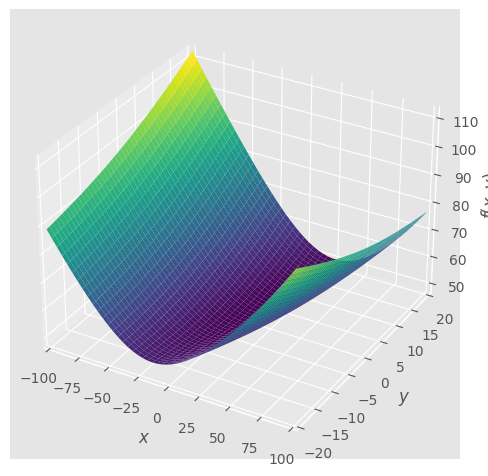

In [26]:
from sympy.plotting import plot3d

plot3d(T, (x, -100, 100), (y, -20, 20))

*(c) Plote um gráfico com curvas de nível $T(x,y) = c$, para $c \in \left\{ 0, 30, 60, 120, 150, 180\right\}$, usando a função [plot_implicit](https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot_implicit.plot_implicit).*

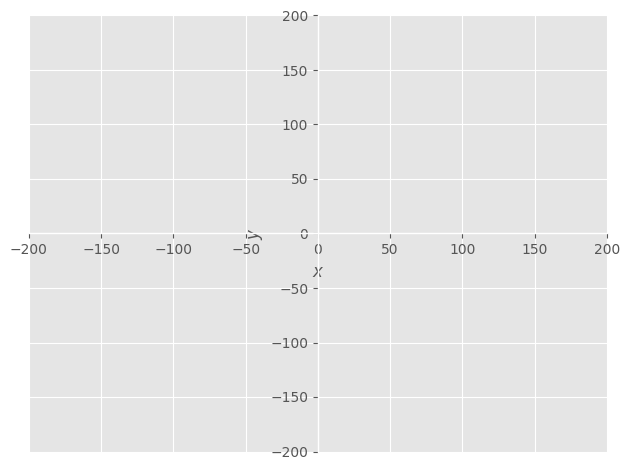

In [27]:
sp.plot_implicit(sp.Eq(T, 0), (x, -200, 200), (y, -200, 200))

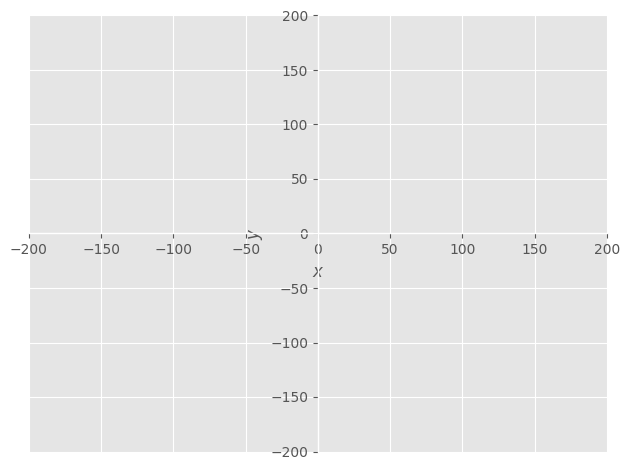

In [28]:
sp.plot_implicit(sp.Eq(T, 30), (x, -200, 200), (y, -200, 200))

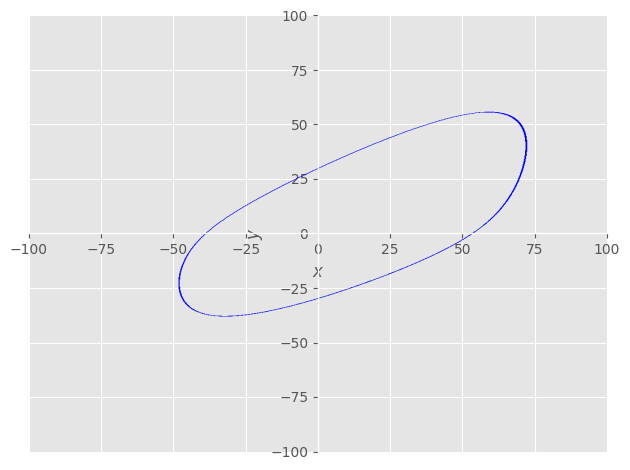

In [29]:
sp.plot_implicit(sp.Eq(T, 60), (x, -100, 100), (y, -100, 100))

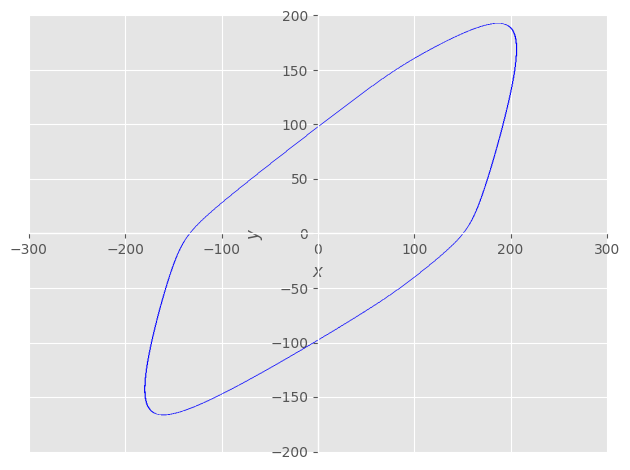

In [30]:
sp.plot_implicit(sp.Eq(T, 120), (x, -300, 300), (y, -200, 200))

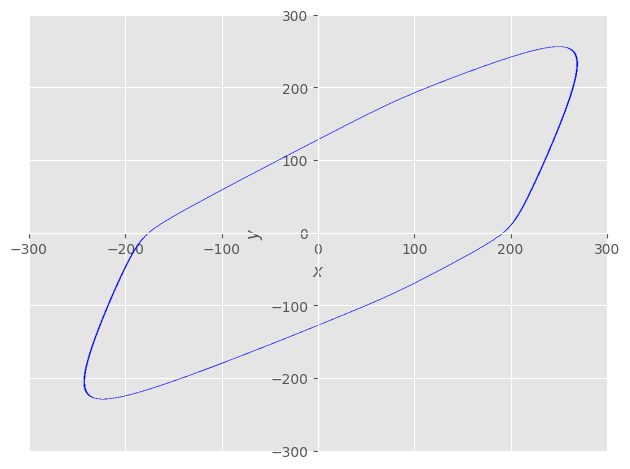

In [31]:
sp.plot_implicit(sp.Eq(T, 150), (x, -300, 300), (y, -300, 300))

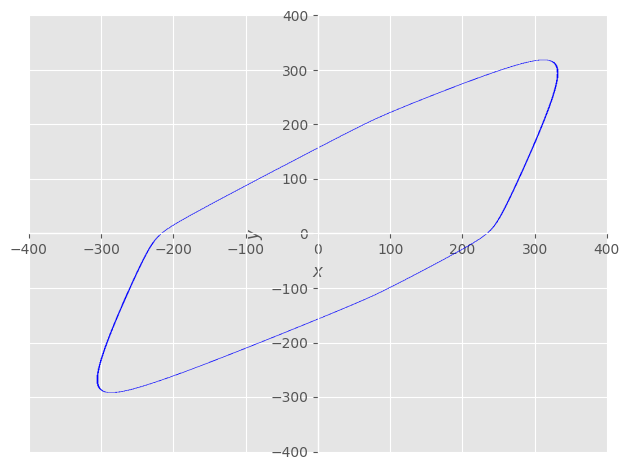

In [32]:
sp.plot_implicit(sp.Eq(T, 180), (x, -400, 400), (y, -400, 400))

_(d) Utilize a função [solve](https://reliability.readthedocs.io/en/latest/Solving%20simultaneous%20equations%20with%20sympy.html) da SymPy para determinar a trajetória que corresponde ao tempo de salvamento mínimo. Ao final, plote o gráfico da trajetória calculada._

In [33]:
Tx = T.diff(x)

Tx

0.08*(x - 80)/sqrt((80 - x)**2 + 900) + 0.666666666666667*(x - y)/sqrt((x - y)**2 + 2500)

In [34]:
Ty = T.diff(y)

Ty

0.4*y/sqrt(y**2 + 400) + 0.666666666666667*(-x + y)/sqrt((x - y)**2 + 2500)

In [35]:
eq01 = sp.Eq(Tx, 0)
eq02 = sp.Eq(Ty, 0)

result = sp.nsolve([eq01, eq02], (x,y), (10, 4))

result

Matrix([
[ 9.3035139326001],
[3.74622449307744]])

In [36]:
x_o, y_o = result[0], result[1]

Calculando o determinante da matrix S-ana no ponto $(x_o,y_o)$ temos:
$$\Delta = \begin{vmatrix}
    T_{xx}(x,y) & T_{xy}(x,y) \\
    T_{yx}(x,y) & T_{yy}(x,y)
\end{vmatrix}=\left[T_{xx}(x,y)\right]\cdot\left[T_{yy}(x,y)\right] -\left[T_{xy}(x,y)\right]^2$$

In [ ]:
delta = T.diff(x, 2)*T.diff(y, 2) - (T.diff(x, y))**2

Aplicando no ponto $(x_o, y_o)$.

In [42]:
delta.subs(x, x_o).subs(y, y_o)

0.000253702484704897

Vendo também $T_{xx}(x_o, y_o)$.

In [43]:
T.diff(x, 2).subs(x, x_o).subs(y, y_o)

0.0132489822271168

Como $\Delta(x_o, y_o) > 0$ e $T_{xx}(x_o, y_o) > 0$ temos um ponto de mínimo.

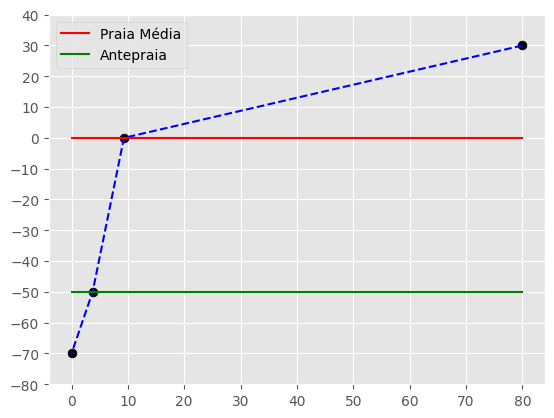

In [47]:
valores_x = [80, x_o, y_o, 0]
valores_y = [30, 0, -50, -70]

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.scatter(valores_x, valores_y, s = 40, color = 'black')
ax.plot(valores_x, valores_y, ls = '--',color = 'blue')
ax.plot(valores_x, [0,0,0,0], color = 'red', label = 'Praia Média')
ax.plot(valores_x, [-50,-50,-50,-50], color = 'green', label = 'Antepraia')
ax.set(ylim = (-80, 40), yticks = np.linspace(-80, 40,13))

ax.legend()
plt.show()

2023 Vicente Helano  
UFCA | Centro de Ciências e Tecnologia